### **0. Setup**

In [23]:
import os, glob, warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family': 'Arial', 'size': 15}
mpl.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'
# my_pal = ['grey', 'mediumseagreen', 'dodgerblue']
my_pal = ['grey', 'mediumseagreen', 'mediumblue']

# set the directory where the data files are waiting
directory = '/Users/ShokenLEE/Desktop/DATA/2022 1-3/3-5-22 P-191 2xT siCTDNEP1,siNEP1R1 Live/72 hr'

### **1. Concanatate all the CSV files**

In [2]:
df = pd.DataFrame()

filepaths = os.listdir(directory)
for filepath in filepaths:
    if filepath.endswith('csv'):
        _df = pd.read_csv(directory + '/' + filepath)
        df = pd.concat([df, _df], axis=0)

In [5]:
df = df.reset_index()

In [8]:
df.head()
# df.tail()

,index,,FileName,Mean_whole,Mean_internal,Mean_periphery,Ratio
0,0,1,3-5-22 U2OS2xT#1 siCTDNEP1 71h 488mNG t1-001.nd2,144.742,33.597,39.716,1.182
1,1,2,3-5-22 U2OS2xT#1 siCTDNEP1 71h 488mNG t1-001.nd2,205.886,94.910,100.233,1.056
2,2,3,3-5-22 U2OS2xT#1 siCTDNEP1 71h 488mNG t1-001.nd2,179.097,64.375,92.735,1.441
3,3,4,3-5-22 U2OS2xT#1 siCTDNEP1 71h 488mNG t1-001.nd2,194.197,80.731,102.259,1.267
4,4,5,3-5-22 U2OS2xT#1 siCTDNEP1 71h 488mNG t1-001.nd2,145.783,34.679,40.954,1.181


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           273 non-null    int64  
 1                   273 non-null    int64  
 2   FileName        273 non-null    object 
 3   Mean_whole      273 non-null    float64
 4   Mean_internal   273 non-null    float64
 5   Mean_periphery  273 non-null    float64
 6   Ratio           273 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 15.1+ KB


### **2. Add columns**

####  **siRNA**

In [9]:
df.loc[df['FileName'].str.contains('siCtrl'), 'siRNA'] = 'siCtrl'
df.loc[df['FileName'].str.contains('CTDNEP1'), 'siRNA'] = 'siCTDNEP1'
df.loc[df['FileName'].str.contains('NEP1R1'), 'siRNA'] = 'siNEP1R1'

### **3. Cleaning**

####  **Drop zero value rows**

In [11]:
df_not_zero = df[df['Mean_whole'] !=0]

In [12]:
df_not_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 272
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           244 non-null    int64  
 1                   244 non-null    int64  
 2   FileName        244 non-null    object 
 3   Mean_whole      244 non-null    float64
 4   Mean_internal   244 non-null    float64
 5   Mean_periphery  244 non-null    float64
 6   Ratio           244 non-null    float64
 7   siRNA           244 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 17.2+ KB


### **4. Analysis**

#### **4-0. Quick check**

In [53]:
df_not_zero.groupby(['siRNA']).mean()

,index,,Mean_whole,Mean_internal,Mean_periphery,Ratio
siRNA,,,,,,
siCTDNEP1,5.764706,6.764706,174.874363,62.239941,77.799353,1.300902
siCtrl,5.235955,6.235955,172.182607,53.809888,103.528416,1.731697
siNEP1R1,4.962264,5.962264,186.229774,69.647000,110.178868,1.588377


Text(0.5, 1.0, 'Ratio of DAG sensor localization: Nuclear rim vs intra-nucleus')

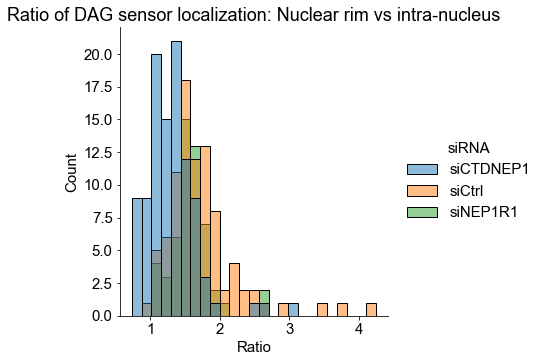

In [15]:
hist = sns.displot(data=df_not_zero, x='Ratio', hue='siRNA')
plt.title('Ratio of DAG sensor localization: Nuclear rim vs intra-nucleus')

#### **4-1. Check cell counts per sample**

[Text(0, 0, 'siCtrl'), Text(1, 0, 'siCTDNEP1'), Text(2, 0, 'siNEP1R1')]

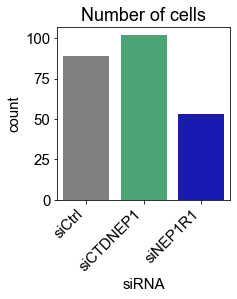

In [30]:
fig_width, fig_height = 3.0, 3.0
fig = plt.figure(figsize=(fig_width,fig_height))
# fig = plt.figure()
ax_count = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_count = sns.countplot(data=df_not_zero, x='siRNA', order=['siCtrl', 'siCTDNEP1', 'siNEP1R1'], palette=my_pal)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Number of cells')
ax_count.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siNEP1R1'], rotation=45, ha='right')

In [22]:
df.groupby(['siRNA']).size()

siRNA
siCTDNEP1    117
siCtrl        93
siNEP1R1      63
dtype: int64

#### **4-2. Ratio of DAG sensor localization: rim vs inside nucleus**

[Text(0, 0, 'siCtrl'), Text(1, 0, 'siCTDNEP1'), Text(2, 0, 'siNEP1R1')]

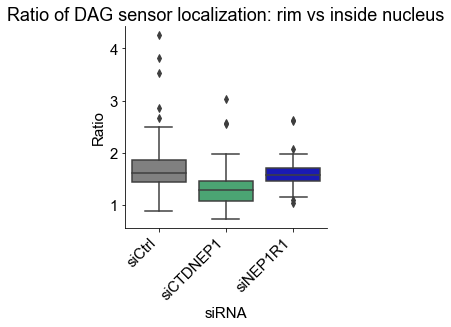

In [44]:
fig = plt.figure(figsize=(3.5,3.5))
ax_box = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_box = sns.boxplot(data=df_not_zero, x='siRNA', y='Ratio', order=['siCtrl', 'siCTDNEP1', 'siNEP1R1'], palette=my_pal)
plt.title('Ratio of DAG sensor localization: rim vs inside nucleus')
plt.ylabel('Ratio')
ax_box.spines['top'].set_visible(False)
ax_box.spines['right'].set_visible(False)
ax_box.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siNEP1R1'], rotation=45, ha='right')

In [45]:
fig.savefig(directory + '/Ratio_box.jpg', bbox_inches='tight')

[Text(0, 0, 'siCtrl'), Text(1, 0, 'siCTDNEP1'), Text(2, 0, 'siNEP1R1')]

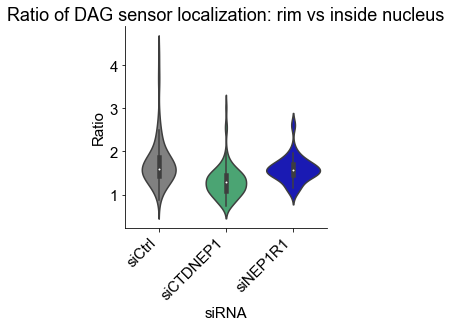

In [46]:
fig = plt.figure(figsize=(3.5,3.5))
ax_vio = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_vio = sns.violinplot(data=df_not_zero, x='siRNA', y='Ratio', order=['siCtrl', 'siCTDNEP1', 'siNEP1R1'], palette=my_pal)
plt.title('Ratio of DAG sensor localization: rim vs inside nucleus')
plt.ylabel('Ratio')
ax_vio.spines['top'].set_visible(False)
ax_vio.spines['right'].set_visible(False)
ax_vio.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siNEP1R1'], rotation=45, ha='right')

In [47]:
fig.savefig(directory + '/Ratio_violin.jpg', bbox_inches='tight')

#### **4-3. Overall mean intensity in nucleus**

[Text(0, 0, 'siCtrl'), Text(1, 0, 'siCTDNEP1'), Text(2, 0, 'siNEP1R1')]

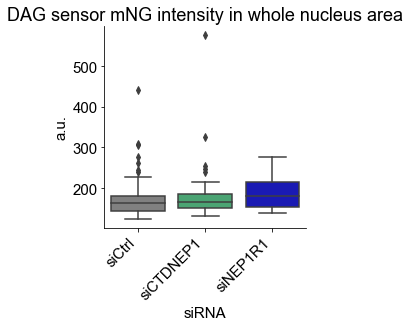

In [48]:
fig = plt.figure(figsize=(3.5,3.5))
ax_box = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_box = sns.boxplot(data=df_not_zero, x='siRNA', y='Mean_whole', order=['siCtrl', 'siCTDNEP1', 'siNEP1R1'], palette=my_pal)
plt.title('DAG sensor mNG intensity in whole nucleus area')
plt.ylabel('a.u.')
ax_box.spines['top'].set_visible(False)
ax_box.spines['right'].set_visible(False)
ax_box.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siNEP1R1'], rotation=45, ha='right')

In [49]:
fig.savefig(directory + '/Mean_whole.jpg', bbox_inches='tight')

#### **4-4. Correlation b/w whole mean intensity and ratio values**

#### Limited to those with mean_whole less than 300

(124.653, 300.0)

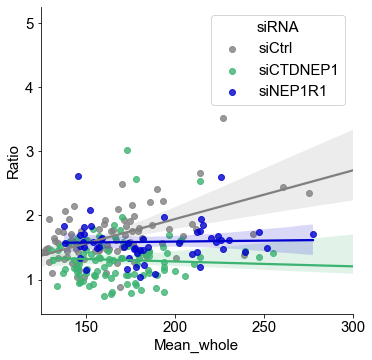

In [39]:
scatter = sns.lmplot(x='Mean_whole', y='Ratio', data=df_not_zero, 
                     hue='siRNA', hue_order=['siCtrl', 'siCTDNEP1', 'siNEP1R1'], 
                     palette=my_pal, legend_out=False)
min = np.min(df_not_zero['Mean_whole'])
plt.xlim([min,300])

In [50]:
scatter.savefig(directory + '/Mean_vs_Ratio_scatter.jpg', bbox_inches='tight')

#### **4-5. Tukey test**

In [51]:
res = pairwise_tukeyhsd(df['Ratio'], df['siRNA'], alpha=0.05)

In [52]:
print(res)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
siCTDNEP1   siCtrl   0.5231  0.001  0.3249  0.7213   True
siCTDNEP1 siNEP1R1   0.2021 0.0846 -0.0209  0.4251  False
   siCtrl siNEP1R1   -0.321 0.0037 -0.5538 -0.0881   True
---------------------------------------------------------
